In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Customer Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As total charges is of object datatype instead of float (because of blanks) , we will replace those blanks with 0 as tenure is 0 and no total charges are recorded
Changing 0 and 1 in Senior Citizen column to Yes and No

In [48]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float64")
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
df['SeniorCitizen']=df['SeniorCitizen'].astype("object")

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking for null values

In [6]:
df.isnull().sum().sum()  

np.int64(0)

Checking duplicate values

In [5]:
print(df.duplicated().sum())
print(df['customerID'].duplicated().sum())

0
0


In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


 Getting insights about the possible reasons/ factors of churn

       Churn
Churn       
No      5174
Yes     1869


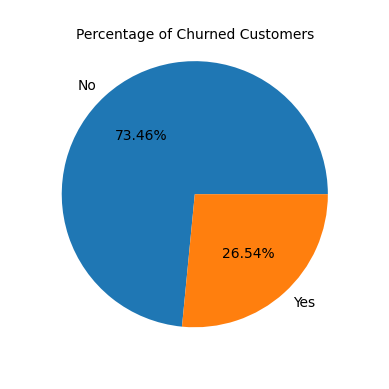

In [2]:
gb=df.groupby("Churn").agg({"Churn":"count"})
print(gb)
plt.pie(gb["Churn"], labels=gb.index,autopct="%1.2f%%",radius=0.9)
plt.title("Percentage of Churned Customers",fontsize=10,y=0.9)
plt.show()

From the pie plot , 26.54% of the customers have churned out

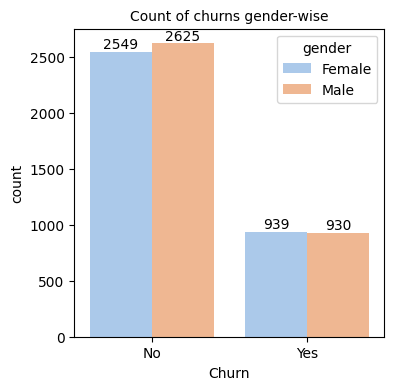

In [48]:
plt.figure(figsize=(4,4))
ax=sns.countplot(df,x="Churn",hue="gender",palette="pastel")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of churns gender-wise",fontsize=10)
plt.show()

From the count plot we cannot decipher any impact of gender on churns

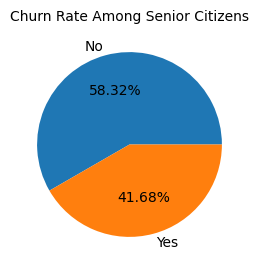

In [141]:
senior= df[df['SeniorCitizen'] == "Yes"]
churn_counts = senior['Churn'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%')
plt.title('Churn Rate Among Senior Citizens',fontsize=10)

plt.show()

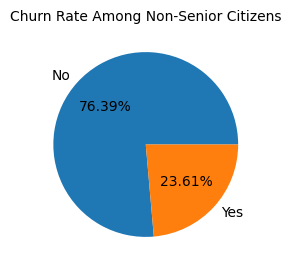

In [148]:
senior= df[df['SeniorCitizen'] == "No"]
churn_counts = senior['Churn'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%')
plt.title('Churn Rate Among Non-Senior Citizens',fontsize=10)

plt.show()


From the above 2 pie charts it can be observed that Churn rate among Senior Citizens is higher than that among
Non-Senior Citizens since 41.7% of the Senior Citizens have churned out ,
whereas only 23.6% of the Non-Senior Citizens have churned out


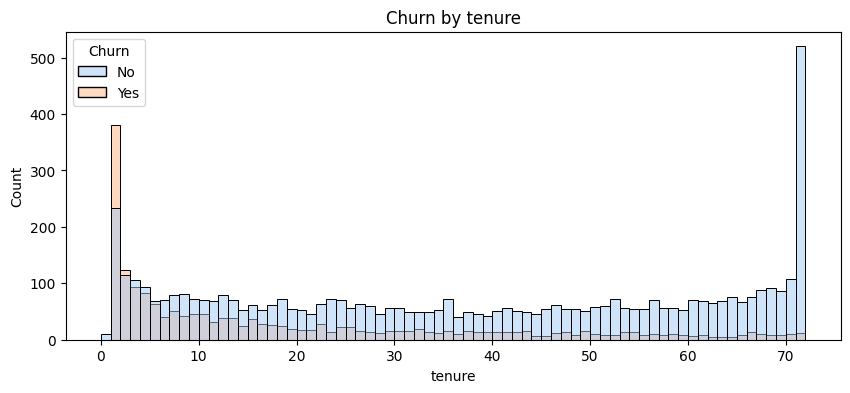

In [63]:


# Plotting
plt.figure(figsize=(10,4))
ax=sns.histplot(df,x="tenure",hue="Churn",bins=72,palette="pastel")

plt.title("Churn by tenure")
plt.show()

It can be seen that the customers with tenure of 1-2 months have churned out the most

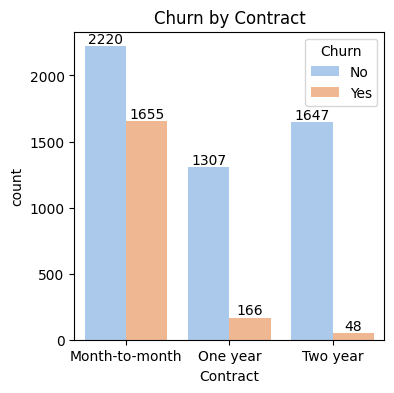

In [12]:
plt.figure(figsize=(4,4))
ax=sns.countplot(df,x="Contract",hue="Churn",palette="pastel")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by Contract")
plt.show()

It is observed that:
Churn Rate is highest in customers having a month-to-month contract and decreases as the contact duration increases. 

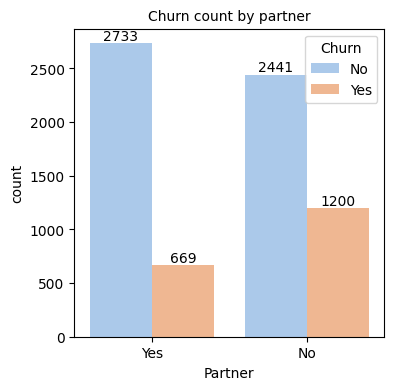

In [59]:
plt.figure(figsize=(4,4))
ax=sns.countplot(df,x="Partner",hue="Churn",palette="pastel")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Churn count by Partner",fontsize=10)
plt.show()

It is observed that:
Customers having partner have a churn rate of ~20%
Customers not having partner have a churn rate of ~33% 

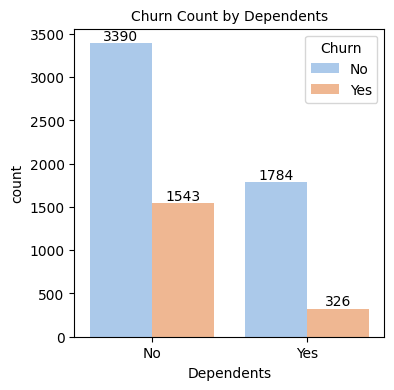

In [60]:
plt.figure(figsize=(4,4))
ax=sns.countplot(df,x="Dependents",hue="Churn",palette="pastel")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Churn Count by Dependents",fontsize=10)
plt.show()

It is observed that:
Customers having dependents have a churn rate of ~15%
Customers not having partner have a churn rate of ~31%

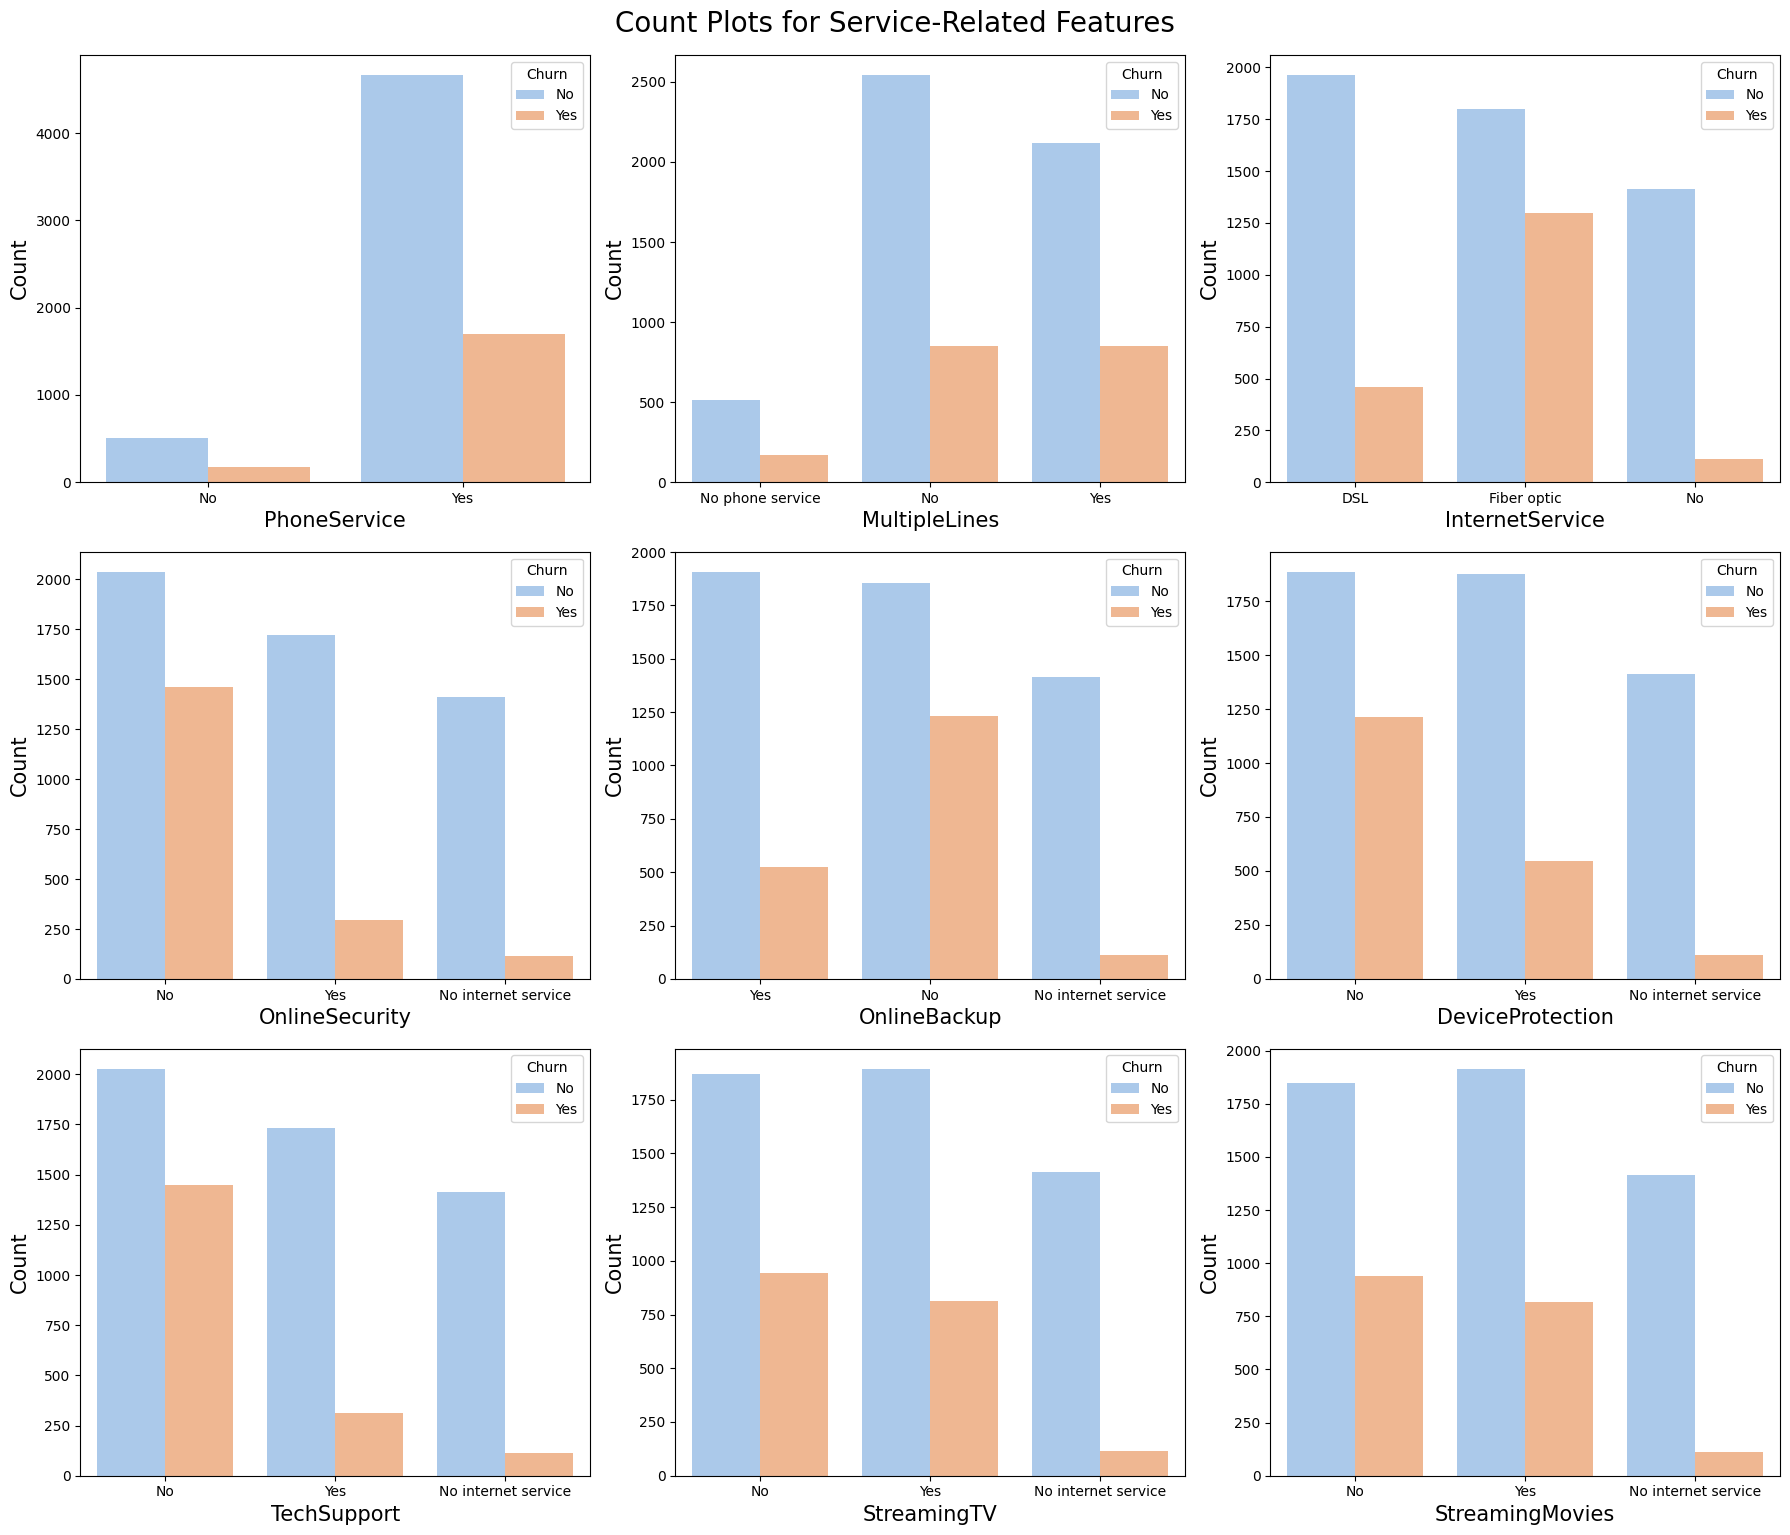

In [72]:
import math
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = math.ceil(len(cols) // n_cols)  

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col,hue="Churn", palette="pastel")
    
    plt.xlabel(col,fontsize=15)
    plt.ylabel("Count",fontsize=15)
   

plt.tight_layout()
plt.suptitle("Count Plots for Service-Related Features", fontsize=20, y=1.02)
plt.show()

In [34]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

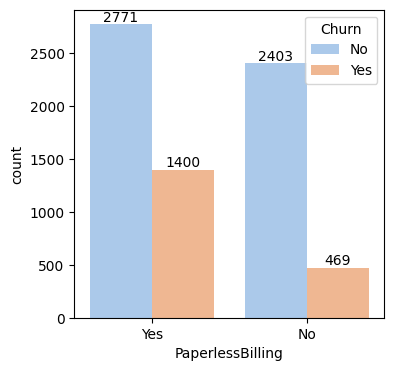

In [62]:
plt.figure(figsize=(4,4))
ax=sns.countplot(df,x="PaperlessBilling",hue="Churn",palette="pastel")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

It is observed that Churn rate is higher in case of Paper less billing (33%) than in case of on paper billing (16%)

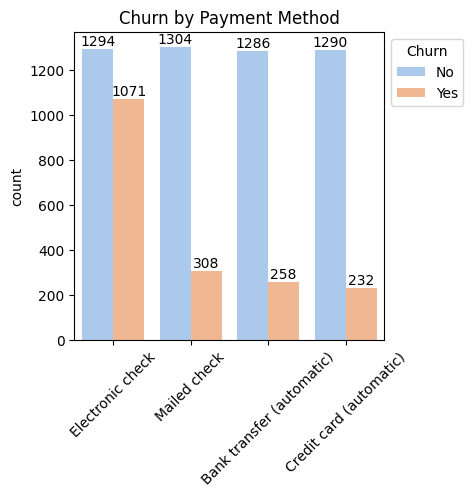

In [82]:
plt.figure(figsize=(4,4))
ax=sns.countplot(df,x="PaymentMethod",hue="Churn",palette="pastel")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn by Payment Method")
plt.legend(title="Churn",bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.xlabel("")
plt.show()

Churn Rates in case of different payment methods :
*Electronic Check -- 45%
*Mailed Check -- 19%
*Bank Transfer (Automatic) -- 17%
*Credit Card (Automatic) -- 15%